In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import utils
from constants import *

In [2]:
date_column = 'Date'

###  System Price of electricity, pence per kilowatt-hour
Source: ONS calculations from BMRS data © Elexon Limited copyright and database right 2024

The System Price is used to **settle the difference between contracted generation or consumption of electricity and actual generation or consumption**. This is calculated for each half hour trading period in the Balancing Market, which is the mechanism used to balance supply and demand on Great Britain’s electricity market.

Companies are contracted **to generate or consume**a certain amount of electricity within each half-hour (known as the Settlement Period), however this may differ from the actual amount generated or consumed. Where companies have generated more or less than the amount of energy their customers consume, this difference is balanced by the UK’s National Grid Transmission System, which buys or sells enough electricity to reconcile the difference. The System Price is designed to reflect the cost incurred by National Grid in doing this.

In [3]:
system_prices = pd.read_excel("data/electricitypricesdataset270624.xlsx", sheet_name="Data")
system_prices[date_column] = pd.to_datetime(system_prices[date_column])
system_prices.set_index(date_column)
system_prices.head()

,Date,Daily average,7-day average
0,2020-01-01,3.951,3.721
1,2020-01-02,1.771,3.486
2,2020-01-03,2.135,3.113
3,2020-01-04,2.700,2.989
4,2020-01-05,2.758,2.853


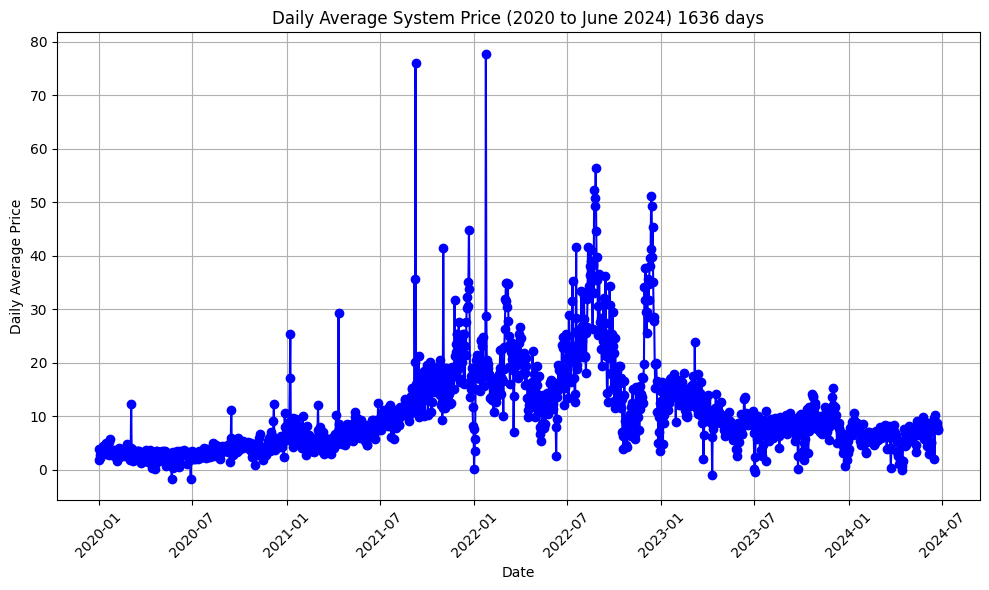

In [4]:
column = 'Daily average'

# Graph the daily average system price from 2020 to June 2024

# Plot the daily average system price
plt.figure(figsize=(10, 6))
plt.plot(system_prices[date_column], system_prices[column], marker='o', linestyle='-', color='b')

# Customize the plot
plt.title(f'Daily Average System Price (2020 to June 2024) {len(system_prices)} days')
plt.xlabel(date_column)
plt.ylabel('Daily Average Price')
plt.grid(True)
plt.xticks(rotation=45)

# Show plot
plt.tight_layout()
plt.show()


## 15 - Day Prediction

In [5]:
start = '2023-02-01'
end = '2023-03-01'
prediction_length = 64

= = = > Chronos pipeline not initialized. Firing up mini pipeline. May take time..


/opt/homebrew/lib/python3.12/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


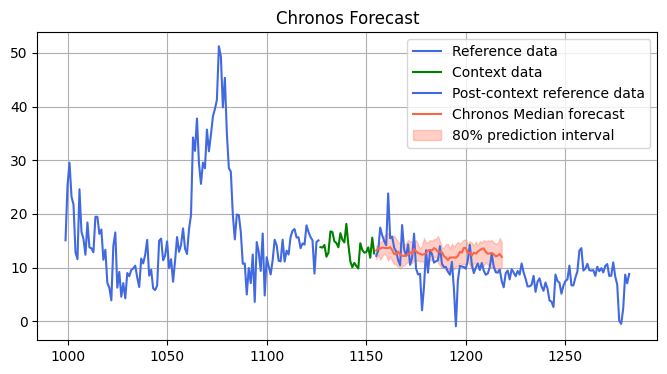

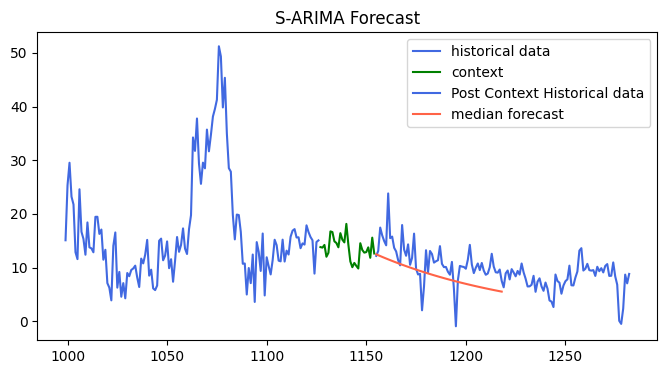

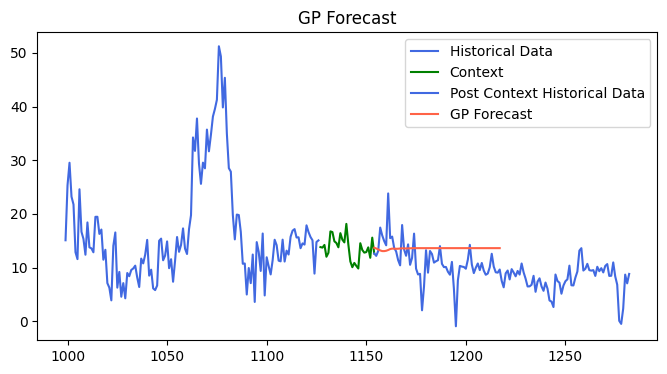

/opt/homebrew/lib/python3.12/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


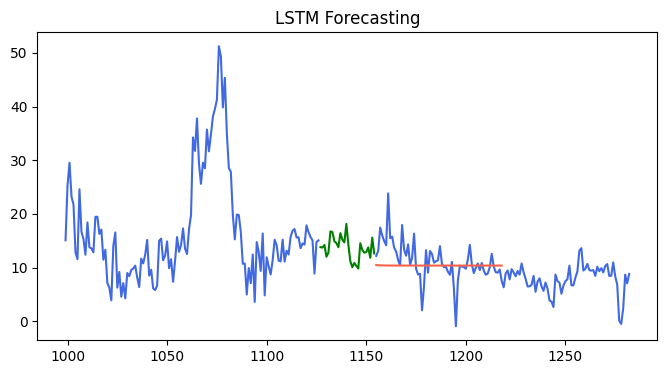


Results comparison for Daily average:

MSE
- chronos_mini MSE: 13.446489669502158
- sarima MSE: 15.675216465533246
- gp MSE: 18.80147608454701
- lstm MSE: 12.978493779043182
NMSE
- chronos_mini NMSE: 1.083154781416648
- sarima NMSE: 1.2626853611387134
- gp NMSE: 1.5145148822638288
- lstm NMSE: 1.0454563189261956



In [6]:
_ = utils.compare_prediction_methods(system_prices,column,date_column,start,end,prediction_length)

In [7]:
context_window_length = utils.find_first_occurrence_index(system_prices,end,"Date") - utils.find_first_occurrence_index(system_prices,start,"Date")
print(f"context_window_length: {context_window_length}")
#utils.whole_window_comparison_of_data(system_prices,column,context_window_length,prediction_length)

context_window_length: 28


## One Month Prediction

= = = > Chronos pipeline not initialized. Firing up mini pipeline. May take time..


/opt/homebrew/lib/python3.12/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


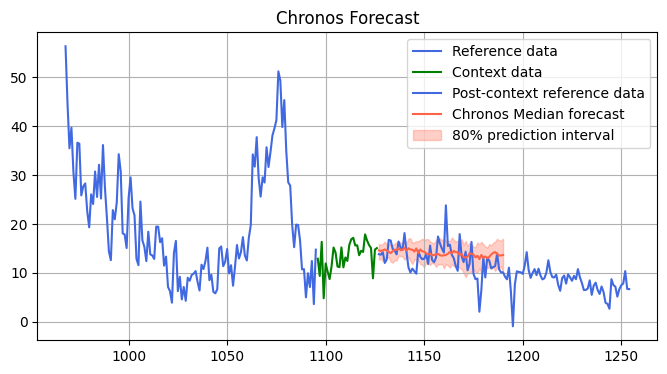

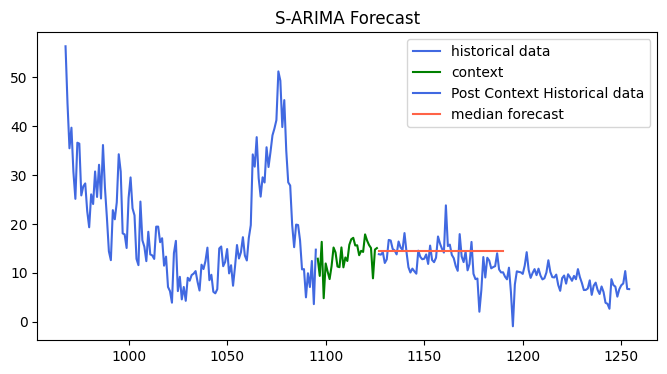

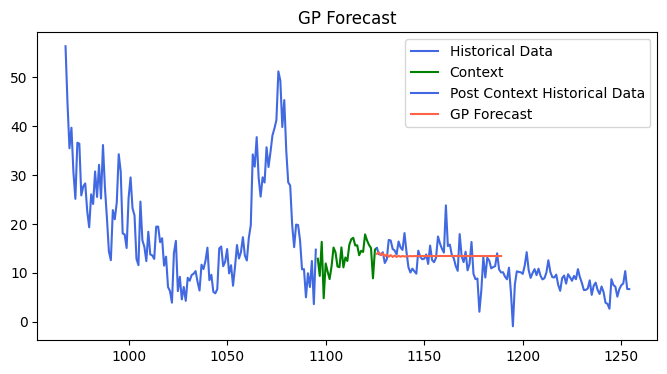

/opt/homebrew/lib/python3.12/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


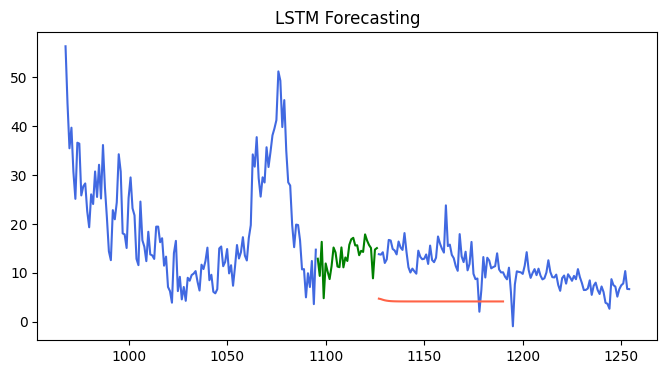


Results comparison for Daily average:

MSE
- chronos_mini MSE: 10.050136470575744
- sarima MSE: 11.454415883599312
- gp MSE: 9.72385681130194
- lstm MSE: 87.12877633945602
NMSE
- chronos_mini NMSE: 1.0578412889716584
- sarima NMSE: 1.2056506991919478
- gp NMSE: 1.0234982632483813
- lstm NMSE: 9.17086224045806



In [8]:
start = '2023-01-01'
end = '2023-02-01'
column = 'Daily average'
prediction_length = 64

_ = utils.compare_prediction_methods(system_prices,column,date_column,start,end,prediction_length)

## Two Month Prediction

= = = > Chronos pipeline not initialized. Firing up mini pipeline. May take time..


/opt/homebrew/lib/python3.12/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


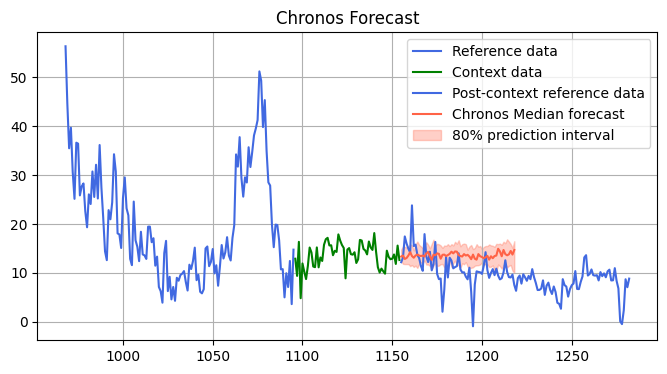

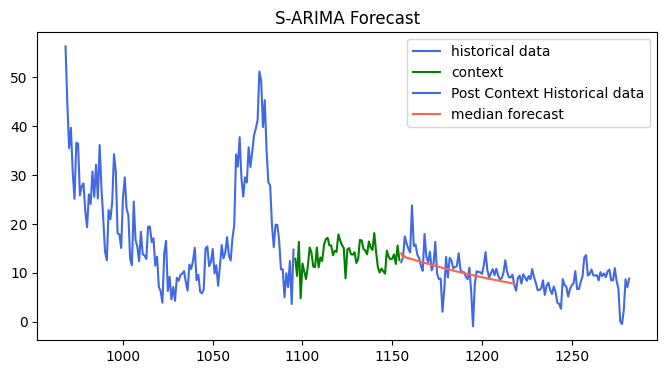

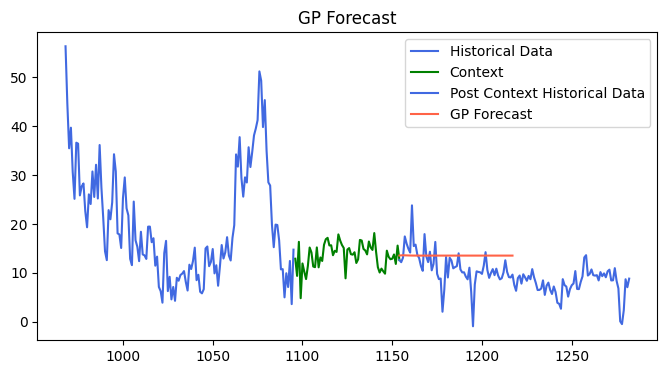

/opt/homebrew/lib/python3.12/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


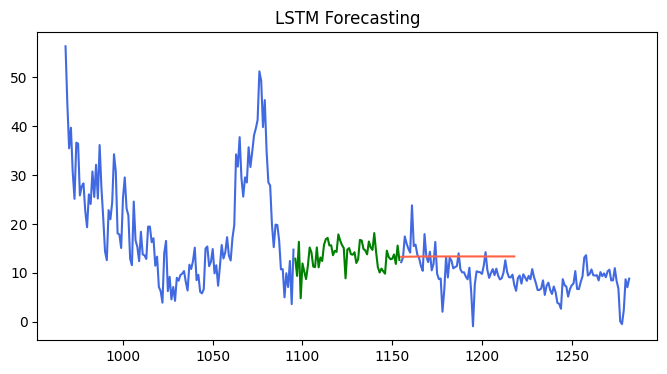


Results comparison for Daily average:

MSE
- chronos_mini MSE: 19.11397282801018
- sarima MSE: 9.57496734067718
- gp MSE: 18.05254957155707
- lstm MSE: 17.30408833437578
NMSE
- chronos_mini NMSE: 1.5396874254463797
- sarima NMSE: 0.7712921299069954
- gp NMSE: 1.4541866216238317
- lstm NMSE: 1.3938958403356365



In [9]:
start = '2023-01-01'
end = '2023-03-01'
column = 'Daily average'
prediction_length = 64
_ = utils.compare_prediction_methods(system_prices,column,date_column,start,end,prediction_length)

## Three Months Prediction

= = = > Chronos pipeline not initialized. Firing up mini pipeline. May take time..


/opt/homebrew/lib/python3.12/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


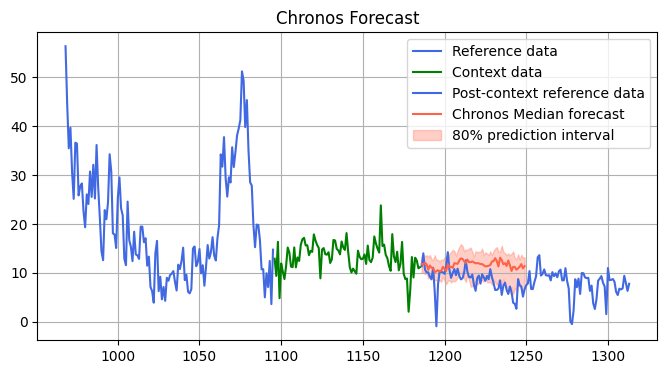

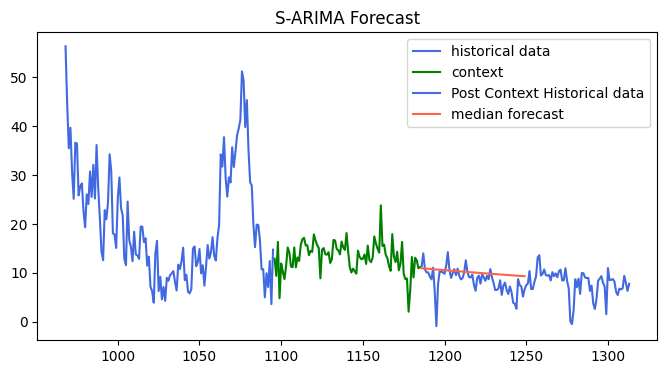

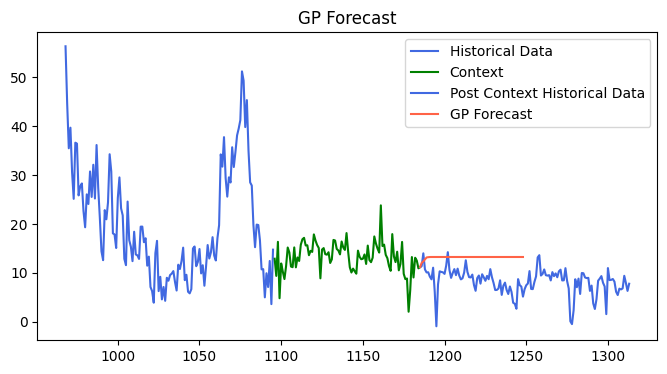

/opt/homebrew/lib/python3.12/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


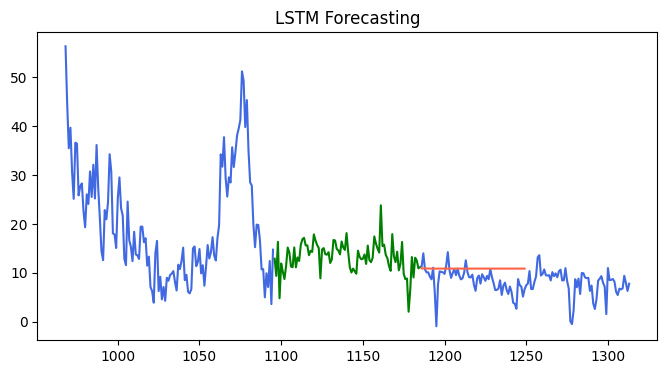


Results comparison for Daily average:

MSE
- chronos_mini MSE: 15.797815423228664
- sarima MSE: 7.715478806227365
- gp MSE: 28.43549011288073
- lstm MSE: 11.750906424691804
NMSE
- chronos_mini NMSE: 2.5274560266740336
- sarima NMSE: 1.2343816461358381
- gp NMSE: 4.54932843129408
- lstm NMSE: 1.8800003966561114



In [10]:
start = '2023-01-01'
end = '2023-04-01'
column = 'Daily average'
prediction_length = 64

_ = utils.compare_prediction_methods(system_prices,column,date_column,start,end,prediction_length)

## Six Months Context

= = = > Chronos pipeline not initialized. Firing up mini pipeline. May take time..


/opt/homebrew/lib/python3.12/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


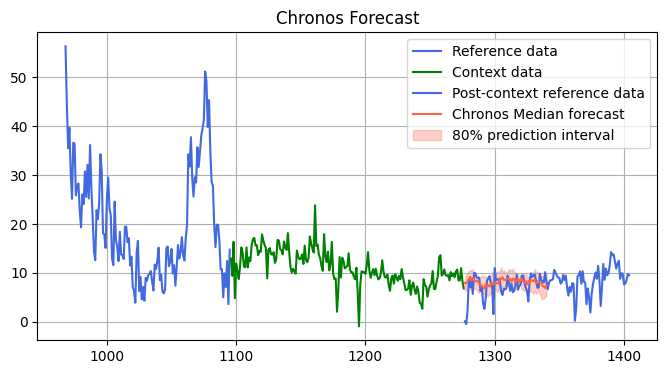

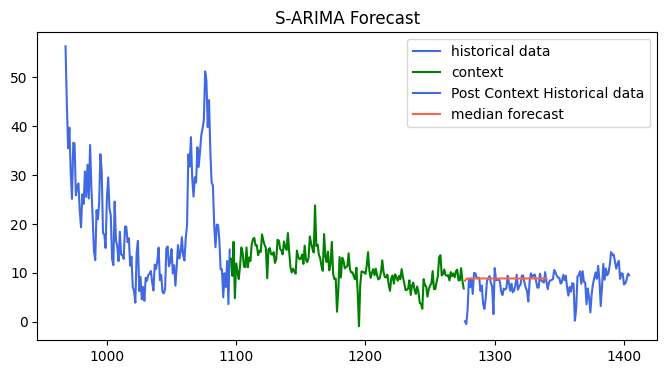

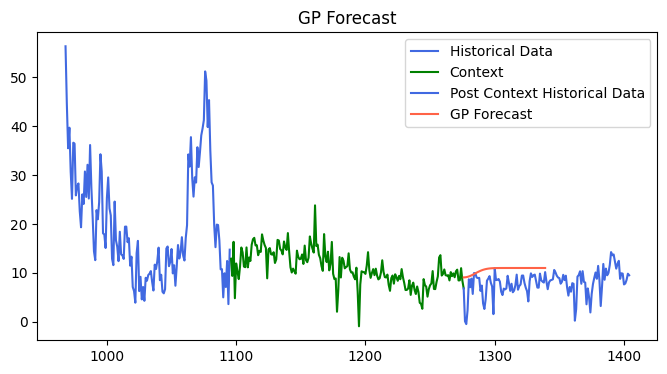

/opt/homebrew/lib/python3.12/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


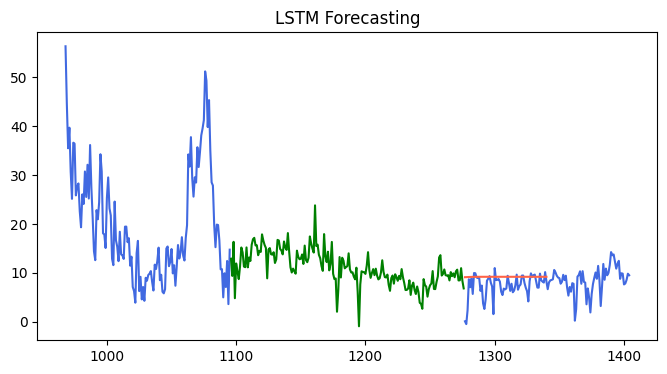


Results comparison for Daily average:

MSE
- chronos_mini MSE: 6.107852392503024
- sarima MSE: 7.5025467212092565
- gp MSE: 15.737944677427915
- lstm MSE: 8.737912240562784
NMSE
- chronos_mini NMSE: 1.1107923863156048
- sarima NMSE: 1.3644356871042735
- gp NMSE: 2.862149901559604
- lstm NMSE: 1.5891029719422385



In [11]:
start = '2023-01-01'
end = '2023-07-01'
column = 'Daily average'
prediction_length = 64

_ = utils.compare_prediction_methods(system_prices,column,date_column,start,end,prediction_length)

## Having seen one anomaly, can you predict next?

= = = > Chronos pipeline not initialized. Firing up mini pipeline. May take time..


/opt/homebrew/lib/python3.12/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


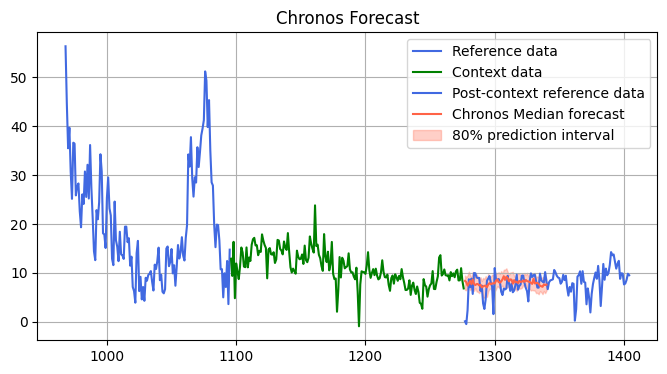

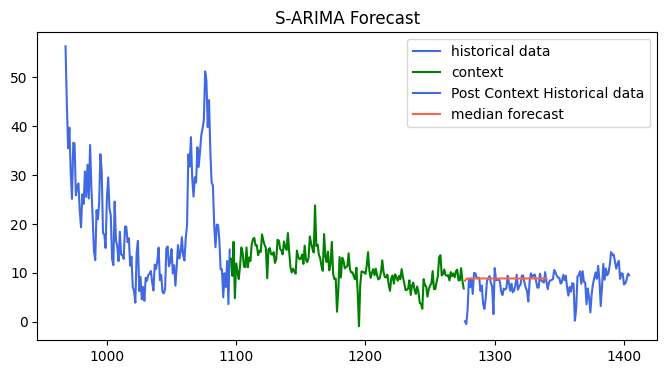

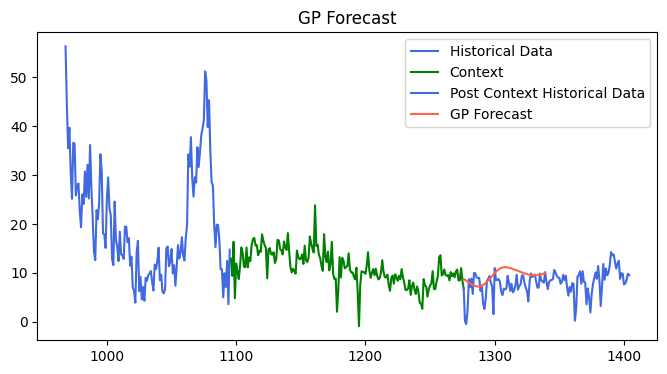

/opt/homebrew/lib/python3.12/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


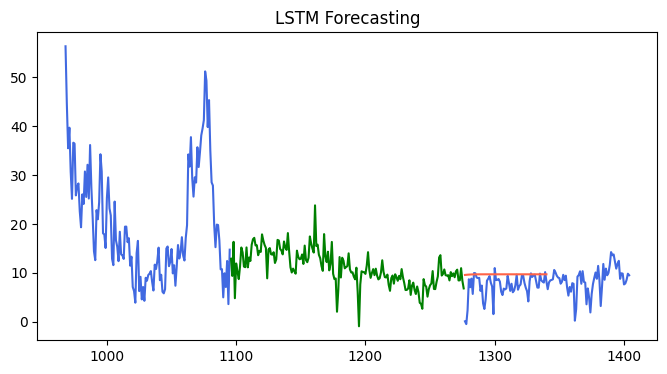


Results comparison for Daily average:

MSE
- chronos_mini MSE: 6.262444746439223
- sarima MSE: 7.5025467212092565
- gp MSE: 10.62166718521027
- lstm MSE: 10.817480446285252
NMSE
- chronos_mini NMSE: 1.1389070162542245
- sarima NMSE: 1.3644356871042735
- gp NMSE: 1.931688305662345
- lstm NMSE: 1.9672994936158548



In [12]:
_ = utils.compare_prediction_methods(system_prices,column,date_column,start,end,prediction_length)

## One Year Context Prediction

= = = > Chronos pipeline not initialized. Firing up mini pipeline. May take time..


/opt/homebrew/lib/python3.12/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


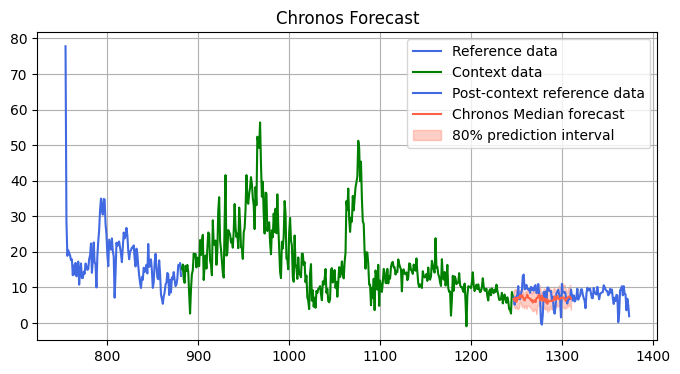

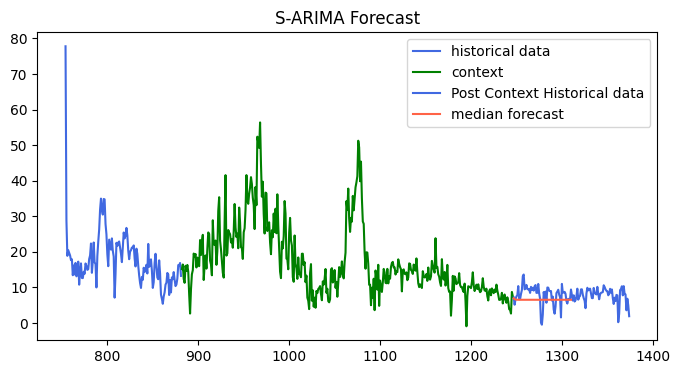

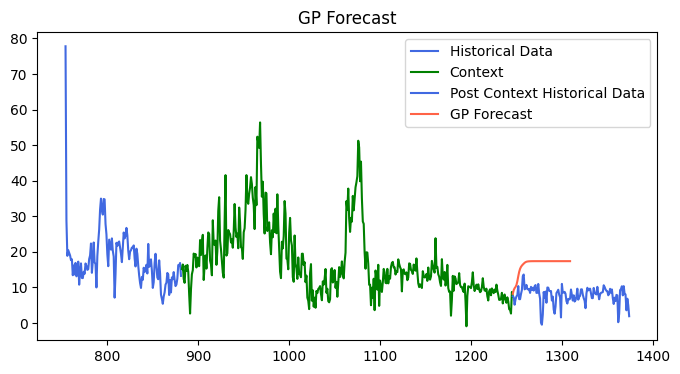

/opt/homebrew/lib/python3.12/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


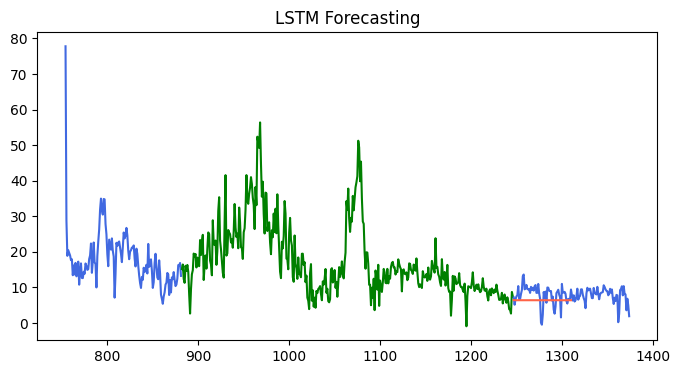


Results comparison for Daily average:

MSE
- chronos_mini MSE: 8.77239444365517
- sarima MSE: 8.921829256153039
- gp MSE: 84.68121401783112
- lstm MSE: 9.278945374703419
NMSE
- chronos_mini NMSE: 1.2454747095793375
- sarima NMSE: 1.2666909557128476
- gp NMSE: 12.022750585727051
- lstm NMSE: 1.3173930869148172



In [13]:
start = '2022-06-01'
end = '2023-06-01'
column = 'Daily average'
prediction_length = 64

_ = utils.compare_prediction_methods(system_prices,column,date_column,start,end,prediction_length)

## Two Year Context Comparison

= = = > Chronos pipeline not initialized. Firing up mini pipeline. May take time..


/opt/homebrew/lib/python3.12/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


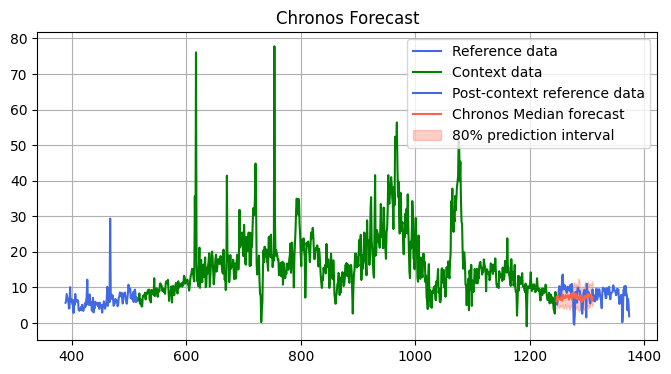

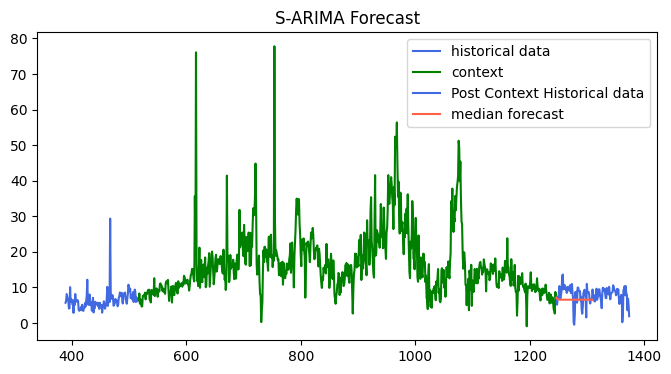

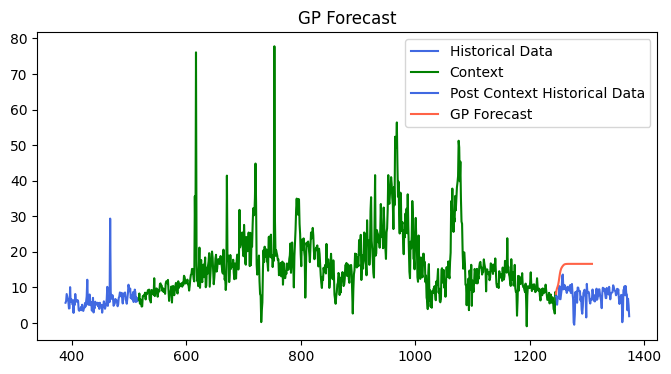

/opt/homebrew/lib/python3.12/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


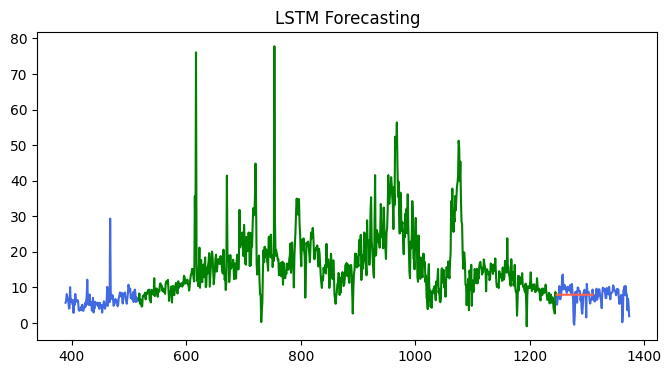


Results comparison for Daily average:

MSE
- chronos_mini MSE: 7.762962498758726
- sarima MSE: 8.869645099425831
- gp MSE: 72.85994580217397
- lstm MSE: 7.0463061233066675
NMSE
- chronos_mini NMSE: 1.102158997263264
- sarima NMSE: 1.2592820267297844
- gp NMSE: 10.34440715368908
- lstm NMSE: 1.0004105639458465



In [14]:
start = '2021-06-01'
end = '2023-06-01'
column = 'Daily average'
prediction_length = 64

_ = utils.compare_prediction_methods(system_prices,column,date_column,start,end,prediction_length)

## Three Year Context

In [15]:
start = '2020-06-01'
end = '2023-06-01'
column = 'Daily average'
prediction_length = 64

# utils.compare_prediction_methods(system_prices,column,start,end,prediction_length)